In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Q1
Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
1. Load data in Pandas.
2. Drop columns that aren’t useful.
3. Drop rows with missing values.
4. Create dummy variables.
5. Take care of missing data.
6. Convert the data frame to NumPy.
7. Divide the data set into training data and test data.

In [52]:
# Load data in Pandas.
hepatitis = pd.read_csv('hepatitis_csv.csv')
diabetes = pd.read_csv('diabetes_csv.csv')

# Drop columns that aren’t useful.
# assuming spiders in hepatitis is not useful
hepatitis.drop(labels = 'spiders', axis = 1, inplace = True)

# Drop rows with missing values.
hepatitis.dropna(axis=1, thresh=int(len(hepatitis)*0.1), inplace = True)

# Create dummy variables
hepatitis=pd.get_dummies(hepatitis, columns=['sex', 'class'], drop_first=True)

# Take care of missing data
hepatitis.fillna(hepatitis.select_dtypes(include='number').mean(), inplace = True)

# Convert the data frame to NumPy
hepatitis.to_numpy()

# Divide the data set into training data and test data.
X = hepatitis.drop('class_live', axis=1)
y = hepatitis['class_live']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q2  
a. Construct a CSV file with the following attributes:  
Study time in hours of ML lab course (x)  
Score out of 10 (y)  
The dataset should contain 10 rows.

b. Create a regression model and display the following:  
    Coefficients: B0 (intercept) and B1 (slope)  
    RMSE (Root Mean Square Error)  
    Predicted responses  
    
c. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.  

d. Implement the model using two methods:  
Pedhazur formula (intuitive)  
Calculus method (partial derivatives, refer to class notes)  

e. Compare the coefficients obtained using both methods and compare them with the analytical solution.  

f. Test your model to predict the score obtained when the study time of a student is 10 hours.  
Note: Do not use scikit-learn.

In [53]:
"""
a. Construct a CSV file with the following attributes:
Study time in hours of ML lab course (x)
Score out of 10 (y)
"""
hours = np.random.normal(20, 10, 10) # mean, stdev, shape
hours[hours < 0] = 0

score = (2 * hours + np.ones(10)) + np.random.random(10) # f(X) + e

df = pd.DataFrame({"hours": hours, "score": score})
df.to_csv("asdf.csv", index = False)

In [80]:
df = pd.read_csv("asdf.csv")
X = df['hours'].to_numpy()
y = df['score'].to_numpy()
n = len(X)

# Calculate the means of X and y
mean_x = np.mean(X)
mean_y = np.mean(y)

# Calculate B1 (slope)
numerator = (n * np.sum(X * y)) - (np.sum(X) * np.sum(y))
denominator = (n * np.sum(X ** 2)) - (np.sum(X) ** 2)
B1 = numerator / denominator

# Calculate B0 (intercept)
B0 = mean_y - (B1 * mean_x)

print(f"Intercept (B0): {B0}")
print(f"Slope (B1): {B1}")


Intercept (B0): 1.6961931743276608
Slope (B1): 1.9908718846817217


In [81]:
"""
b. Create a regression model and display the following:
    Coefficients: B0 (intercept) and B1 (slope)
    RMSE (Root Mean Square Error)
    Predicted responses
"""
df = pd.read_csv("asdf.csv")
X = df['hours'].to_numpy()
y = df['score'].to_numpy()

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones_like(X), X]  # This will be the matrix [1, X]

# Calculate coefficients using the Normal Equation: (X^T X)^-1 X^T y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)
print(theta_best.ndim)
print(theta_best.shape)

b0, b1 = theta_best
print(f"Intercept (B0): {b0}")
print(f"Slope (B1): {b1}")

# Make predictions
predictions = X_b @ theta_best

# Calculate RMSE
rmse = np.sqrt(np.mean((y - predictions) ** 2))
print(f"RMSE: {rmse}")

# Display predictions
print("Predicted responses:", predictions)

[1.69619317 1.99087188]
1
(2,)
Intercept (B0): 1.696193174327611
Slope (B1): 1.9908718846817228
RMSE: 0.32865581663227017
Predicted responses: [57.11938649  1.69619317 16.03361538 54.21039917 21.35108312 63.34039694
 50.95116641 44.40463253 39.80740343 15.81116761]


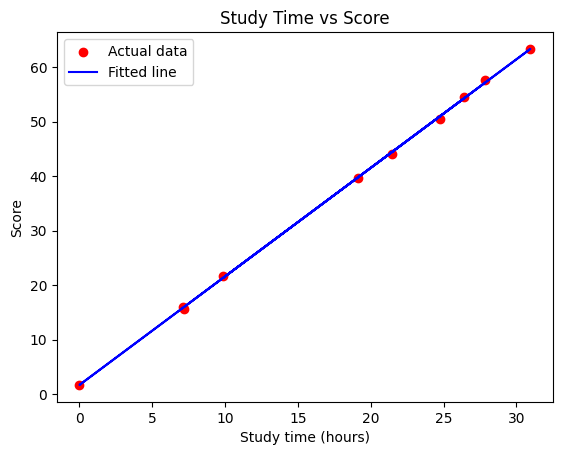

In [55]:
"""
c. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.
"""
# Scatter plot of actual data
plt.scatter(df['hours'], df['score'], color='red', label='Actual data')

# Plot the regression line
plt.plot(df['hours'], predictions, color='blue', label='Fitted line')

plt.xlabel('Study time (hours)')
plt.ylabel('Score')
plt.title('Study Time vs Score')
plt.legend()
plt.show()

In [56]:
"""
d. Implement the model using two methods:
Pedhazur formula (intuitive)
Calculus method (partial derivatives, refer to class notes)
"""
# Calculate means
X_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate covariance and variance
cov_xy = np.mean(X * y) - X_mean * y_mean
var_x = np.mean(X**2) - X_mean**2

# Calculate B1 and B0
b1_pedhazur = cov_xy / var_x
b0_pedhazur = y_mean - b1_pedhazur * X_mean

print(f"Pedhazur B0: {b0_pedhazur}")
print(f"Pedhazur B1: {b1_pedhazur}")

Pedhazur B0: 1.6961931743276608
Pedhazur B1: 1.9908718846817217


In [57]:
"""
Calculus method (partial derivatives, refer to class notes)
"""

# Partial derivatives calculation
X = df['hours'].to_numpy()
y = df['score'].to_numpy()

# Add intercept term
X_b = np.c_[np.ones_like(X), X]

# Calculate coefficients
coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

b0_calculus, b1_calculus = coefficients

print(f"Calculus B0: {b0_calculus}")
print(f"Calculus B1: {b1_calculus}")

Calculus B0: 1.696193174327611
Calculus B1: 1.9908718846817228


In [58]:
"""
e. Compare the coefficients obtained using both methods and compare them with the analytical solution.
"""
print(f"Pedhazur B0: {b0_pedhazur}, B1: {b1_pedhazur}")
print(f"Calculus B0: {b0_calculus}, B1: {b1_calculus}")

Pedhazur B0: 1.6961931743276608, B1: 1.9908718846817217
Calculus B0: 1.696193174327611, B1: 1.9908718846817228


In [59]:
"""
f. Test your model to predict the score obtained when the study time of a student is 10 hours.
"""
hours_to_predict = np.array([10])
X_to_predict = np.c_[np.ones_like(hours_to_predict), hours_to_predict]
predicted_score = X_to_predict @ theta_best

print(f"Predicted score for 10 hours of study: {predicted_score[0]}")

Predicted score for 10 hours of study: 21.60491202114484
